In [ ]:
import pandas as pd
import sklearn
from sklearn import model_selection, svm, metrics
import numpy as np

import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
FF_data = pd.read_csv("/content/drive/MyDrive/FFP/forestfires.csv")
#print(len(FF_data))
#print(FF_data)
X = FF_data[["temp", "RH", "wind", "rain"]]
Y = FF_data["area"]
classes = ["not burned", "burned"]
#print(Y)
for i in range(0,len(Y)): # 0 hectars of land bruned means class is 0 else class is 1
  if(Y.iloc[i]>0.0):
    Y.iloc[i] = 1
  else:
    Y.iloc[i] = 0
Y=Y.astype(int)
#print(Y)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X.values, Y.values, test_size=0.2)
#print(len(x_train))
#print(len(x_test))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Logistic Regression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test.reshape(-1,4))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: ",accuracy)
print("Prediction\t", "Actual ")
print("-----------------------------")
for (p,y) in zip(predictions,y_test):
  print(classes[p],"\t\t",classes[y])


Accuracy:  0.4423076923076923
Prediction	 Actual 
-----------------------------
burned 		 not burned
burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
burned 		 not burned
not burned 		 burned
burned 		 burned
burned 		 not burned
burned 		 burned
not burned 		 burned
burned 		 burned
not burned 		 burned
burned 		 not burned
not burned 		 not burned
not burned 		 burned
burned 		 not burned
not burned 		 not burned
not burned 		 burned
burned 		 not burned
burned 		 burned
burned 		 not burned
not burned 		 burned
burned 		 burned
burned 		 burned
burned 		 burned
not burned 		 burned
not burned 		 burned
burned 		 burned
not burned 		 not burned
not burned 		 not burned
burned 		 not burned
not burned 		 not burned
burned 		 burned
burned 		 burned
burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
burned 		 burned
burned 		 burned
not burned 		 burned
burned 		 not burned
burned 		 burned
not burned 		 not burned

In [ ]:
clf=RandomForestClassifier(n_estimators=100) #n_estimators is The number of trees in the forest
clf.fit(x_train,y_train)

predictions = clf.predict(x_test.reshape(-1,4))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: ",accuracy)
print("Prediction\t", "Actual ")
print("-----------------------------")
for (p,y) in zip(predictions,y_test):
  print(classes[p],"\t\t",classes[y])

Accuracy:  0.5096153846153846
Prediction	 Actual 
-----------------------------
not burned 		 not burned
burned 		 burned
not burned 		 burned
burned 		 burned
burned 		 not burned
not burned 		 not burned
burned 		 burned
not burned 		 burned
not burned 		 not burned
burned 		 burned
not burned 		 burned
burned 		 burned
not burned 		 burned
not burned 		 not burned
burned 		 not burned
burned 		 burned
not burned 		 not burned
burned 		 not burned
burned 		 burned
not burned 		 not burned
not burned 		 burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
burned 		 burned
burned 		 burned
not burned 		 burned
not burned 		 burned
burned 		 burned
not burned 		 not burned
burned 		 not burned
not burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
burned 		 burned
burned 		 burned
burned 		 not burned
burned 		 burned
not 

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

predictions = nb.predict(x_test.reshape(-1,4))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: ",accuracy)
print("Prediction\t", "Actual ")
print("-----------------------------")
for (p,y) in zip(predictions,y_test):
  print(classes[p],"\t\t",classes[y])

Accuracy:  0.4423076923076923
Prediction	 Actual 
-----------------------------
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 not burned
not burned 		 burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
not burned 		 not burned
not burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 not burned
not burned 		 not burned
not burned 		 burned
not burned 		 burned
not burned 		 burned
not burned 		 bu

Accuracy:  0.5192307692307693


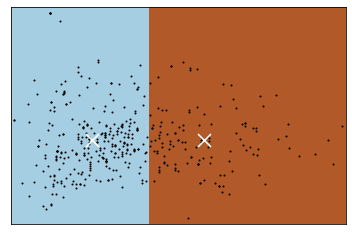

In [ ]:
#K Means
from sklearn.decomposition import PCA
KM_data = FF_data[["temp", "RH", "wind", "rain"]]
KM_X_train, KM_X_test, KM_Y_train, KM_Y_test = sklearn.model_selection.train_test_split(KM_data.values, Y.values, test_size=0.2)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)

kmeans.fit(KM_X_train)
predictions = kmeans.predict(KM_X_test.reshape(-1,4))
accuracy = metrics.accuracy_score(KM_Y_test, predictions)
print("Accuracy: ",accuracy)

reduced_data = PCA(n_components=2).fit_transform(KM_X_train)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
